# HW02: Python 
(due October 5th)

Main goal: predicting house value from population and houses features in each block

In [1]:
# Load Data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [2]:
X_full, y_full = data.data, data.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]
print(n_samples,n_features)

20640 8


# Summary Statistics

/home/cmarangon/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'House Value'), Text(0, 0.5, 'Count')]

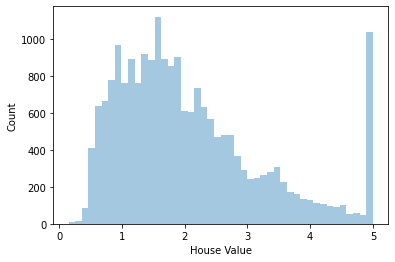

In [3]:
from seaborn import distplot
# make a histogram of the label variable

yplt = distplot(y_full, kde=False)
yplt.set(xlabel='House Value', ylabel='Count')


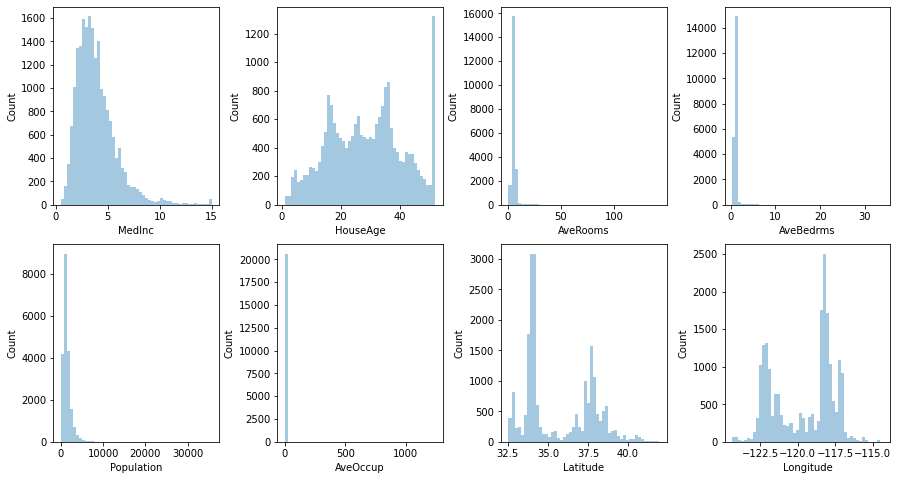

In [4]:
import matplotlib.pyplot as plt
# make histograms of all predictors

fig, ax= plt.subplots(2, 4)
fig.set_size_inches(15, 8)
fig.subplots_adjust(wspace=0.35)

for i, ax_i in zip(range(0, len(X_full.T)), ax.reshape(-1)):
    xplt = distplot(X_full.T[i], ax=ax_i, bins=50, kde=False)
    xplt.set(xlabel=data.feature_names[i], ylabel='Count')

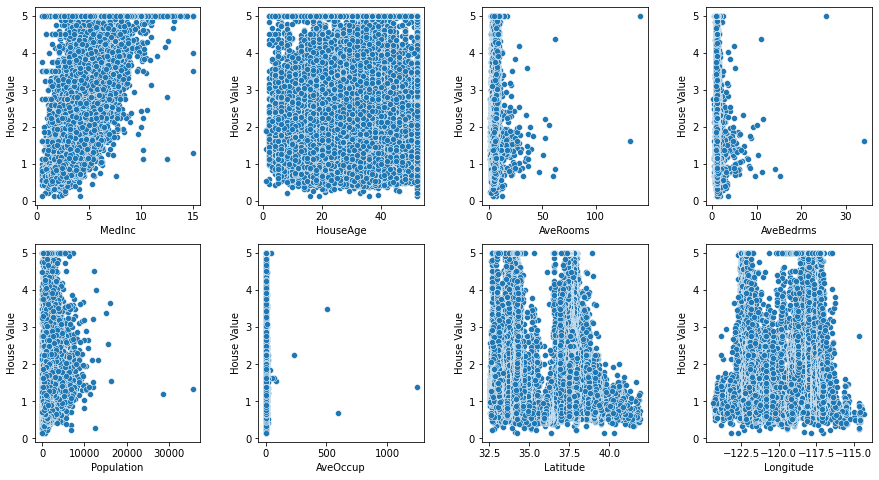

In [5]:
from seaborn import scatterplot
# make scatterplots of all predictors with the label

fig, ax= plt.subplots(2, 4)
fig.set_size_inches(15, 8)
fig.subplots_adjust(wspace=0.35)

for i, ax_i in zip(range(0, len(X_full.T)), ax.reshape(-1)):
    xplt = scatterplot(x=X_full.T[i], y=y_full, ax=ax_i)
    xplt.set(xlabel=data.feature_names[i], ylabel='House Value')

# Train/Test Split

In [6]:
from sklearn.model_selection import train_test_split
# Split the data into 80% training and 20% test

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, train_size=0.8)

# Pre-Processing

In [7]:
from sklearn.preprocessing import StandardScaler
# produce standardized predictors with mean zero and variance one 
# fit the transformer in the training set and apply to the whole data

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
# produce quadratic polynomial features from all standardized predictors
# squared values and pairwise interactions 
# fit the transformer in the training set and apply to the whole data

poly_features=PolynomialFeatures(2)
poly_features.fit(X_train)
X_train_pol2 = poly_features.transform(X_train_scaled)
X_test_pol2 = poly_features.transform(X_test_scaled)

## Fractional Ridge Regression
https://arxiv.org/abs/2005.03220

https://nrdg.github.io/fracridge/

In [ ]:
!pip install fracridge

In [9]:
from fracridge import FracRidgeRegressorCV
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# train fractional ridge on raw predictors
# report the chosen fraction penalty
# report MSE and r-squared in test set 
fridge = FracRidgeRegressorCV()
fridge.fit(X_train, y_train)
pen = fridge.best_frac_
print("Chosen fraction penalty: %s" % pen)

y_pred = fridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: %s" % mse)
print("R2: %s" % r2)

Chosen fraction penalty: 0.2
MSE: 0.8537562641229165
R2: 0.36108151989365467


In [11]:
# train fractional ridge on stanardized predictors
# report the chosen fraction penalty
# report MSE and r-squared in test set 

fridge.fit(X_train_scaled, y_train)
pen = fridge.best_frac_
print("Chosen fraction penalty: %s" % pen)

y_pred = fridge.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: %s" % mse)
print("R2: %s" % r2)

Chosen fraction penalty: 0.2
MSE: 5.265162259295967
R2: -2.9402457230326675


In [12]:
# train fractional ridge on standardized predictors including quadratics and interactions
# report the chosen fraction penalty
# report MSE and r-squared in test set 

fridge.fit(X_train_pol2, y_train)
pen = fridge.best_frac_
print("Chosen fraction penalty: %s" % pen)

y_pred = fridge.predict(X_test_pol2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE: %s" % mse)
print("R2: %s" % r2)

Chosen fraction penalty: 0.30000000000000004
MSE: 1.007311703086444
R2: 0.24616651218307606


In [13]:
from seaborn import regplot

<AxesSubplot:>

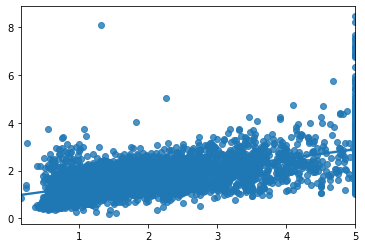

In [14]:
# report a binned regplot of the true outcome versus predictions in the test set

regplot(x=y_test, y=y_pred)

<AxesSubplot:>

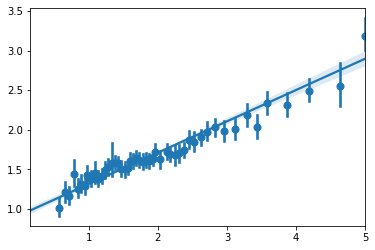

In [15]:
regplot(x=y_test, y=y_pred, x_bins=50)